In [1]:
import matplotlib.pyplot as plt

In [2]:
from nhtsa_ciss_python.scene_diagram import BlitzReader

In [3]:
reader = BlitzReader("../tests/20201010130.blz")

In [4]:
vehicles = reader.get_vehicles(only_named=True)
labels = reader.get_labels()
curves = reader.get_curves()

(-300.0, 300.0)

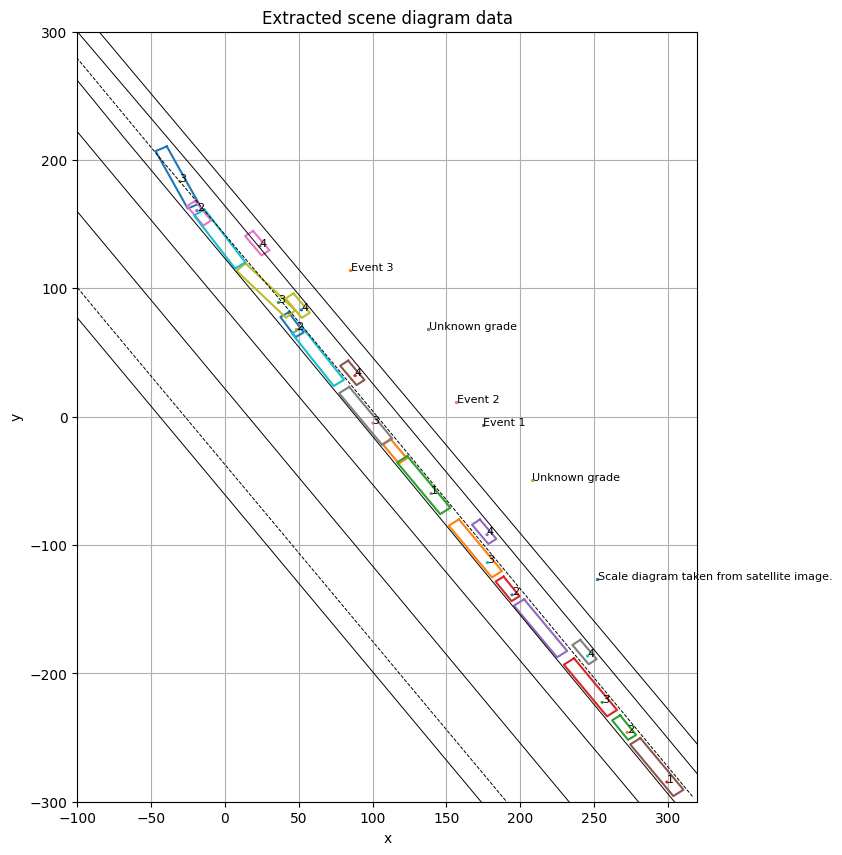

In [7]:
fig, ax = plt.subplots(figsize=(8, 10), facecolor="w")

for veh in vehicles:
    veh_poly = veh.outer_box()
    ax.plot(*veh_poly.boundary.xy)

for label in labels:
    label_poly = label.outer_box()
    ax.plot(*label_poly.boundary.xy)
    ax.text(label.posX, label.posY, s=label.text, fontsize=8)

for i, curve in enumerate(curves):
    line_style = None
    if int(curve.attributes["tdt"]):
        line_style = "--"
    ax.plot(*curve.linestring.coords.xy, ls=line_style, color="k", lw=0.7)

ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Extracted scene diagram data")

ax.set_xlim(-100, 320)
ax.set_ylim(-300, 300)
